In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from pprint import pprint
%matplotlib inline

##  CO2 Levels atop Mauna Loa, HI
Source: https://gml.noaa.gov/ccgg/trends/data.html

Atmospheric CO₂ levels from air samples collected at Mauna Loa Observatory, Hawaii, USA from March 1958 onwards

In [2]:
url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv'

df = pd.read_csv(url, comment='#', parse_dates={'date': ['year', 'month']})
df.set_index('date', inplace=True)
df.index.freq = 'MS'
df.head()

,decimal date,average,deseasonalized,ndays,sdev,unc
date,,,,,,
1958-03-01,1958.2027,315.70,314.43,-1,-9.99,-0.99
1958-04-01,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05-01,1958.3699,317.51,314.71,-1,-9.99,-0.99
1958-06-01,1958.4548,317.24,315.14,-1,-9.99,-0.99
1958-07-01,1958.5370,315.86,315.18,-1,-9.99,-0.99


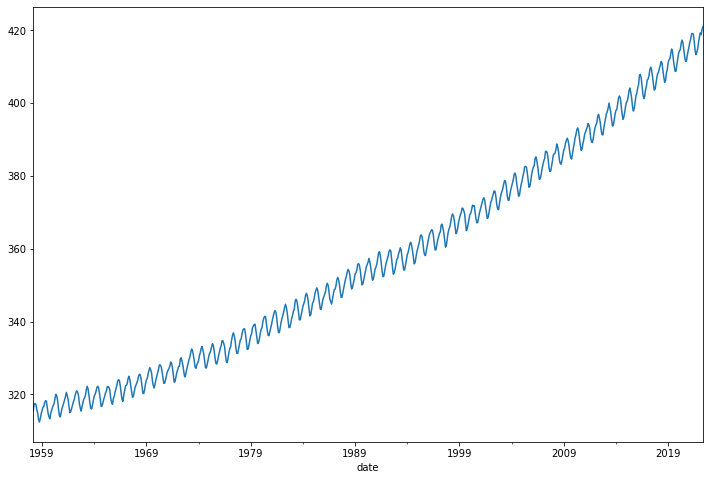

In [3]:
df['average'].plot(figsize=(12, 8))
plt.show()

In [4]:
df.to_csv('data/Mauna_Loa_monthly_CO2.csv')

## Energy Production
Source: https://fred.stlouisfed.org/series/IPG2211A2N

Contains data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 onwards

In [5]:
fred_url = 'https://api.stlouisfed.org/fred/series'

# get your own free api key from here: https://fredaccount.stlouisfed.org/apikeys
params = {
    'series_id': 'IPG2211A2N',
    'api_key': 'c3452dc037cd58c814dc6c26a88380d0',
    'file_type': 'json'
}

# download dataset information from FRED API
r = requests.get(fred_url, params=params).json()
pprint(r)

{'realtime_end': '2022-06-26',
 'realtime_start': '2022-06-26',
 'seriess': [{'frequency': 'Monthly',
              'frequency_short': 'M',
              'id': 'IPG2211A2N',
              'last_updated': '2022-06-17 08:19:09-05',
              'notes': 'The industrial production (IP) index measures the real '
                       'output of all relevant establishments located in the '
                       'United States, regardless of their ownership, but not '
                       'those located in U.S. territories.\n'
                       '\n'
                       'NAICS = 2211,2\n'
                       '\n'
                       'Source Code: IP.G2211A2.N',
              'observation_end': '2022-05-01',
              'observation_start': '1939-01-01',
              'popularity': 32,
              'realtime_end': '2022-06-26',
              'realtime_start': '2022-06-26',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_s

In [6]:
# download series' observations
r = requests.get(fred_url + '/observations', params=params).json()
pprint(r, depth=1)  # print structure of response

{'count': 1001,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [...],
 'offset': 0,
 'order_by': 'observation_date',
 'output_type': 1,
 'realtime_end': '2022-06-26',
 'realtime_start': '2022-06-26',
 'sort_order': 'asc',
 'units': 'lin'}


In [7]:
# print a single observation
pprint(r['observations'][0])

{'date': '1939-01-01',
 'realtime_end': '2022-06-26',
 'realtime_start': '2022-06-26',
 'value': '3.3298'}


In [8]:
# load "date" and "value" column into Pandas DataFrame
df = pd.json_normalize(r['observations'])[['date', 'value']]

# convert "date" column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index.freq = 'MS'

# rename "value" column and convert to numeric
df.columns = ['production']
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,production
date,
1939-01-01,3.3298
1939-02-01,3.3552
1939-03-01,3.4315
1939-04-01,3.4569
1939-05-01,3.4569


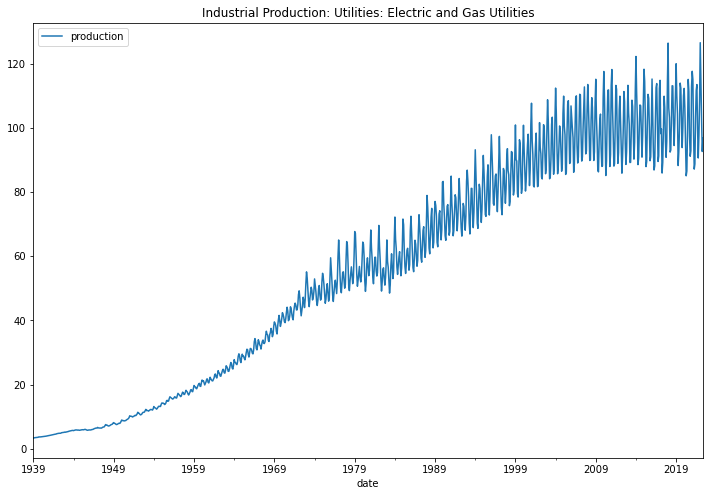

In [9]:
# plot series
df.plot(title='Industrial Production: Utilities: Electric and Gas Utilities', figsize=(12, 8))
plt.show()

In [10]:
df.to_csv('data/Industrial_production.csv')

## U.S. Population Data
Source: https://fred.stlouisfed.org/series/POPTHM

Contains monthly U.S. population estimates in thousands from January 2011 onwards   
Population includes resident population plus armed forces overseas   
The monthly estimate is the average of estimates for the first of the month and the first of the following month

In [11]:
params['series_id'] = 'S4248SM144NCEN'

# download dataset information from FRED API
r = requests.get(fred_url, params=params).json()
pprint(r)

{'realtime_end': '2022-06-26',
 'realtime_start': '2022-06-26',
 'seriess': [{'frequency': 'Monthly',
              'frequency_short': 'M',
              'id': 'S4248SM144NCEN',
              'last_updated': '2022-06-08 09:01:14-05',
              'observation_end': '2022-04-01',
              'observation_start': '1992-01-01',
              'popularity': 26,
              'realtime_end': '2022-06-26',
              'realtime_start': '2022-06-26',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': "Merchant Wholesalers, Except Manufacturers' Sales "
                       'Branches and Offices: Nondurable Goods: Beer, Wine, '
                       'and Distilled Alcoholic Beverages Sales',
              'units': 'Millions of Dollars',
              'units_short': 'Mil. of $'}]}


In [12]:
# download series' observations
r = requests.get(fred_url + '/observations', params=params).json()
pprint(r, depth=1)  # print structure of response

{'count': 364,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [...],
 'offset': 0,
 'order_by': 'observation_date',
 'output_type': 1,
 'realtime_end': '2022-06-26',
 'realtime_start': '2022-06-26',
 'sort_order': 'asc',
 'units': 'lin'}


In [13]:
# print a single observation
pprint(r['observations'][0])

{'date': '1992-01-01',
 'realtime_end': '2022-06-26',
 'realtime_start': '2022-06-26',
 'value': '3459'}


In [14]:
# load "date" and "value" column into Pandas DataFrame
df = pd.json_normalize(r['observations'])[['date', 'value']]

# convert "date" column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index.freq = 'MS'

# rename "value" column and convert to numeric
df.columns = ['population']
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,population
date,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


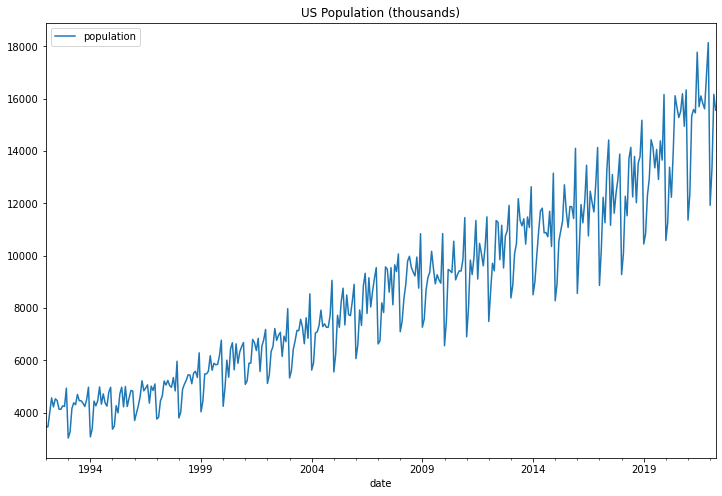

In [15]:
# plot series
df.plot(title='US Population (thousands)', figsize=(12, 8))
plt.show()

In [16]:
df.to_csv('data/US_population.csv')

## Real Manufacturing and Trade Inventories
Source: https://fred.stlouisfed.org/series/INVCMRMT

Real Manufacturing and Trade Inventory Estimates in Chained 2012 Dollars, Seasonally Adjusted, Jan 1997 onwards

In [17]:
params['series_id'] = 'INVCMRMT'

# download dataset information from FRED API
r = requests.get(fred_url, params=params).json()
pprint(r)

{'realtime_end': '2022-06-26',
 'realtime_start': '2022-06-26',
 'seriess': [{'frequency': 'Monthly',
              'frequency_short': 'M',
              'id': 'INVCMRMT',
              'last_updated': '2022-05-27 07:49:02-05',
              'notes': 'BEA Account Code: KSMT\n'
                       'Real Manufacturing and Trade Inventories is used in '
                       'the calculation of INVCMRMTSPL '
                       '(https://fred.stlouisfed.org/series/INVCMRMTSPL ). '
                       'This series is based on the North American Industry '
                       'Classification System (NAICS), which replaced the '
                       'Standard Industrial Classification (SIC) system. The '
                       'SIC is no longer published with this release, and the '
                       'SIC series is INVHMRMT '
                       '(https://fred.stlouisfed.org/series/INVHMRMT).',
              'observation_end': '2022-03-01',
              'observation_s

In [18]:
# download series' observations
r = requests.get(fred_url + '/observations', params=params).json()
pprint(r, depth=1)  # print structure of response

{'count': 303,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [...],
 'offset': 0,
 'order_by': 'observation_date',
 'output_type': 1,
 'realtime_end': '2022-06-26',
 'realtime_start': '2022-06-26',
 'sort_order': 'asc',
 'units': 'lin'}


In [19]:
# print a single observation
pprint(r['observations'][0])

{'date': '1997-01-01',
 'realtime_end': '2022-06-26',
 'realtime_start': '2022-06-26',
 'value': '1301161.0'}


In [20]:
# load "date" and "value" column into Pandas DataFrame
df = pd.json_normalize(r['observations'])[['date', 'value']]

# convert "date" column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index.freq = 'MS'

# rename "value" column and convert to numeric
df.columns = ['y']
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,y
date,
1997-01-01,1301161.0
1997-02-01,1307080.0
1997-03-01,1303978.0
1997-04-01,1319740.0
1997-05-01,1327294.0


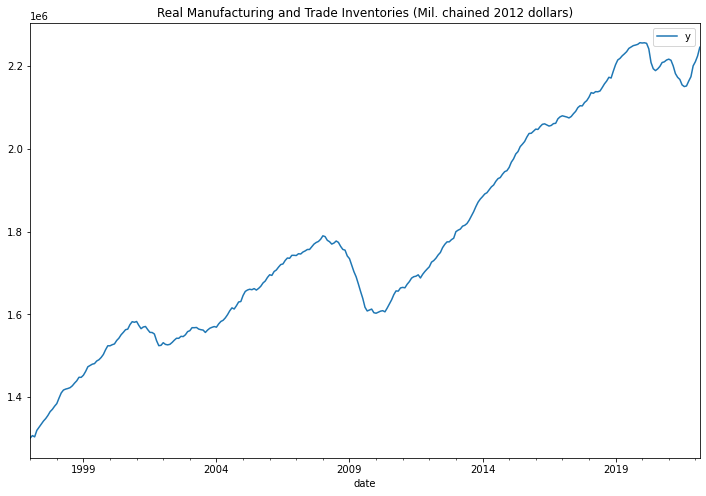

In [21]:
# plot series
df.plot(title='Real Manufacturing and Trade Inventories (Mil. chained 2012 dollars)', figsize=(12, 8))
plt.show()

In [22]:
df.to_csv('data/Real_manufacturing.csv')

## All-Transactions House Price Index for California
Source: https://fred.stlouisfed.org/series/CASTHPI

Estimated using sales prices and appraisal data

In [23]:
params['series_id'] = 'CASTHPI'

# download series' observations
r = requests.get(fred_url + '/observations', params=params).json()

# load "date" and "value" column into Pandas DataFrame
df = pd.json_normalize(r['observations'])[['date', 'value']]

# convert "date" column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index.freq = 'QS'

# rename "value" column and convert to numeric
df.columns = ['index_1980']
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,index_1980
date,
1975-01-01,41.68
1975-04-01,42.74
1975-07-01,44.27
1975-10-01,45.77
1976-01-01,47.79


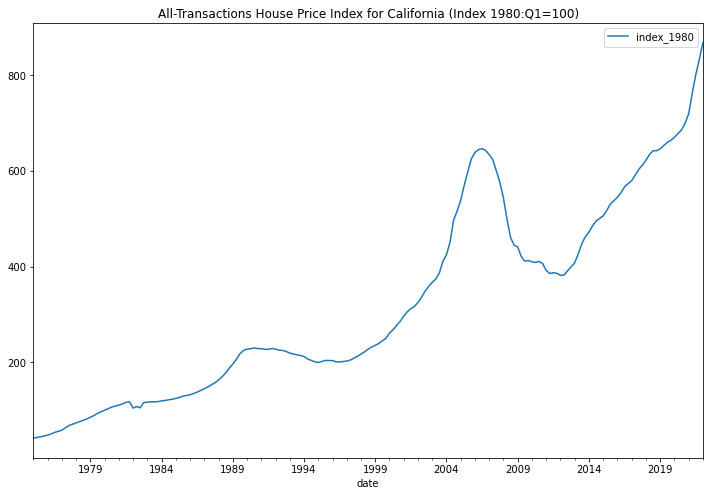

In [24]:
# plot series
df.plot(title='All-Transactions House Price Index for California (Index 1980:Q1=100)', figsize=(12, 8))
plt.show()

In [25]:
df.to_csv('data/California_house_price_index.csv')

## California Hospitality Industry Employees
Source: https://fred.stlouisfed.org/series/CALEIHN

All Employees: Leisure and Hospitality in California in Thousands of Persons, Not Seasonally Adjusted, from Jan 1990 onwards

In [26]:
params['series_id'] = 'CALEIHN'

# download series' observations
r = requests.get(fred_url + '/observations', params=params).json()

# load "date" and "value" column into Pandas DataFrame
df = pd.json_normalize(r['observations'])[['date', 'value']]

# convert "date" column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index.freq = 'MS'

# rename "value" column and convert to numeric
df.columns = ['employees']
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,employees
date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


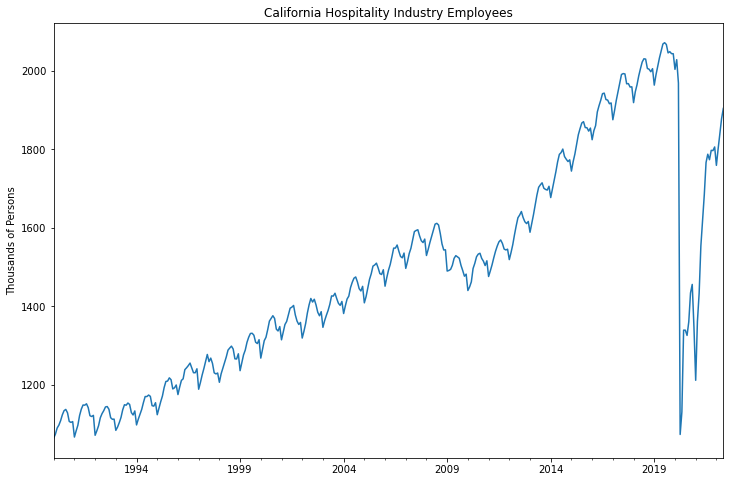

In [27]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df['employees'].plot(figsize=(12,8), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [28]:
df.to_csv('data/California_hospitality_industry_employees.csv')